Pedro Ivo Vasconcelos - TP

## **Capítulo 5**

Planta:  $$G(s) = \frac{2.77}{(130s +1)}$$

Planta discretizada(período de amostragem = 10s): $$C(z) = \frac{0.20508781}{(z - 0.92596108)}$$

In [16]:
import control as ctl
#discretizando a planta
num = [2.77]
den = [130, 1]
G_s = ctl.TransferFunction(num, den)
sampling_time = 10

G_z = ctl.sample_system(G_s, sampling_time, method='zoh')

print(G_z)

<TransferFunction>: sys[60236]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 0.2051
---------
z - 0.926

dt = 10



1) Critério de Jury a formula da planta: $$G(z) = \frac{0.2051}{z - 0.926}$$

Usando a fórmula $$\frac{K*G(z)}{1 + K*G(z)}$$
E aplicando a planta G(z) a fórmula:
$$\frac{K\frac{0.2051}{z - 0.926}}{1 + K\frac{0.2051}{z - 0.926}}$$
E rearranjando a equação:
$$\frac{k*0.2051}{z - 0.926 + k * 0.2051}$$
E os valores de K que satisfazem essa condição de magnitude para ser estável
 dentro do raio unitário:
$$|- 0.926 + k * 0.2051∣<1$$
Para garantir que o sistema em malha fechada seja estável, o valor do ganho
K deve estar na faixa:
$$−0.36079<K<9.39054$$

In [17]:
from sympy import symbols, solve
#cálculo da faixa de valores de K
K = symbols('K')
c1, c2 = -0.926, 0.2051
expr1 = c1 + K * c2 - 1
expr2 = c1 + K * c2 + 1

# Resolvendo para K em cada caso
K1 = solve(expr1, K)
K2 = solve(expr2, K)
print(f"Intervalo de {K2} < K < {K1}")

Intervalo de [-0.360799609946368] < K < [9.39054119941492]


2) Realizando os cálculos:

$$G(jw) = \frac{0.2051}{jw - 0.926}$$
$$1 + K * \frac{0.2051}{z + 0.926} = 0$$
$$K*\frac{0.2051}{z + 0.926} = -1$$
$$z - 0.926 = -k *0.2051$$
$$z - 0.926 + k*0.2051 = 0$$
Para K=1:
$$F(z) = z - 0,7209 = 0$$
$$P1 = 0,7209$$
$$F(z) = \frac{G(z)}{1 + G(z)} = \frac{0,2051}{z – 0,7209}$$
Para K = 12:
$$F(z) = \frac{KG(z)}{1 + KG(z)}$$
$$F(z) = \frac{12G(z)}{1+12G(z)} = \frac{2,4612}{z + 1,5352}$$

No caso de K=12 o "círculo" envolve o ponto -1 como se pode ver no Diagrama de Nyquist, e por conta disso o sistema se torna instável:


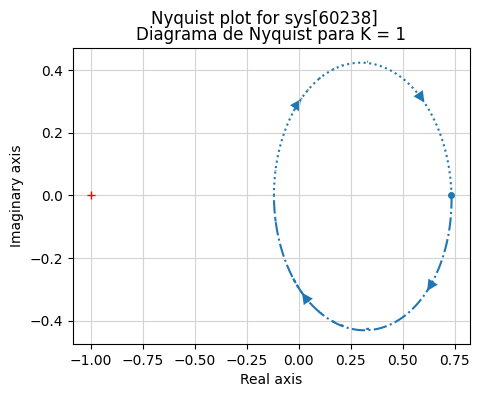

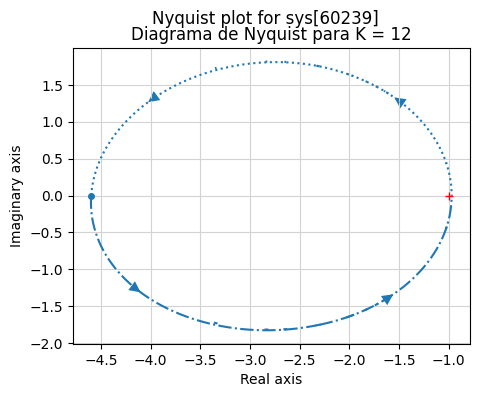

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
#Ganhos k
k1 = 1
k3 = 12

#Funções de transferência
num1 = [0.2051]
den1 = [1, -0.7209]
num12 = [2.4612]
den12 = [1, -1.5352]
Gz1 = ctl.TransferFunction(num1, den1, True)
Gz12 = ctl.TransferFunction(num12, den12, True)

new_figsize = (6.4 * 0.8, 4.8 * 0.8)

plt.figure(figsize=new_figsize)
ctl.nyquist_plot(Gz1)
plt.title('Diagrama de Nyquist para K = 1')
plt.show()

plt.figure(figsize=new_figsize)
ctl.nyquist_plot(Gz12)
plt.title('Diagrama de Nyquist para K = 12')
plt.show()

3)Sim, a margem de fase se consegue realizando operações com a expressão de de malha fechada para a planta onde, com um determinado K a fórmula:
$$F(z) = \frac{K*G(z)}{1 + K*G(z)}$$
Onde um dos métodos é calcular para cada frequência sua margem de fase, que foi realizado a seguir para frequências entre 0 e 5, qual o valor mais próximo de 60º.


C:\Users\Pedro\AppData\Roaming\Python\Python312\site-packages\control\margins.py:546: UserWarning: stability_margins: Falling back to 'frd' method because of chance of numerical inaccuracy in 'poly' method.
  margin = stability_margins(sys)


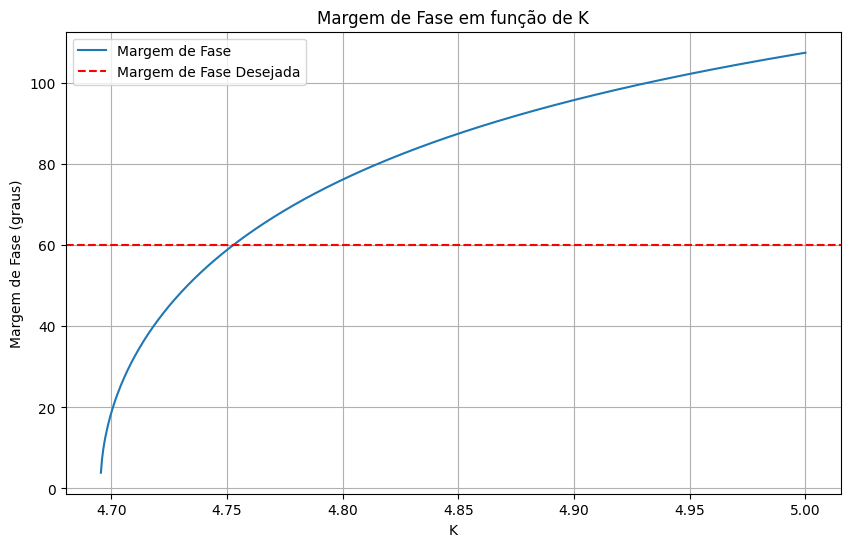

O valor de K mais próximo para alcançar uma margem de fase de 60° é: 4.752475
A planta em malha fechada aproximada é <TransferFunction>: sys[90396]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.9747
-----------
z + 0.04873

dt = 1



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

def calcula_malha_fechada(K):
    # Aplicando o ganho K à função de transferência G(z)
    num_KGz = [K * 0.2051]
    den_KGz = [1, -0.926]

    # Convertendo G(z) para malha fechada com o controlador K
    Gz_k = ctl.TransferFunction(num_KGz, den_KGz, 1)
    Cz_K = ctl.feedback(Gz_k, 1) # O segundo argumento é H(z), que é 1 para realimentação unitária
    return Cz_K


# Função para calcular a margem de fase para um dado K
def calcular_margem_fase(K):
    Cz_K = calcula_malha_fechada(K)

    # Calculando a margem de fase (PM)
    _, PM, _, _ = ctl.margin(Cz_K)

    return PM

# Testando diferentes valores de K para encontrar uma margem de fase próxima de 60 graus
K_teste = np.linspace(0, 5, 10000)
margens_fase = [calcular_margem_fase(K) for K in K_teste]

# Plotando a margem de fase em função de K
plt.figure(figsize=(10, 6))
plt.plot(K_teste, margens_fase, label='Margem de Fase')
plt.axhline(y=60, color='r', linestyle='--', label='Margem de Fase Desejada')
plt.xlabel('K')
plt.ylabel('Margem de Fase (graus)')
plt.title('Margem de Fase em função de K')
plt.legend()
plt.grid(True)
plt.show()

# Encontrando o K que mais se aproxima da margem de fase desejada e sua planta retroalimentada
indice_proximo = np.argmin(np.abs(np.array(margens_fase) - 60))
K_ideal = K_teste[indice_proximo]
Cz_ideal = calcula_malha_fechada(K_ideal)
print(f'O valor de K mais próximo para alcançar uma margem de fase de 60° é: {K_ideal:.6f}')
print(f'A planta em malha fechada aproximada é {Cz_ideal}')

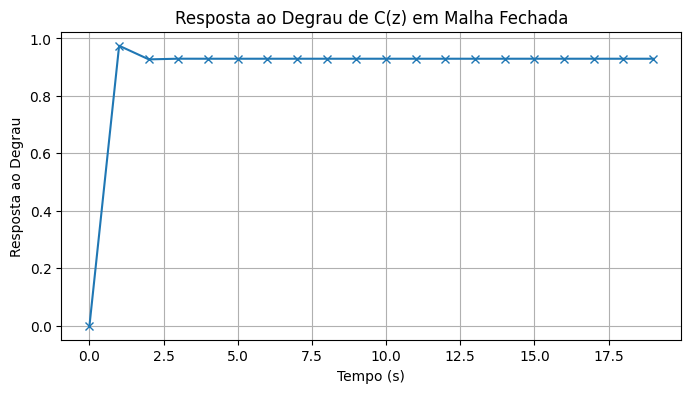

In [20]:
# Gerando a resposta ao degrau
tempo, resposta = ctl.step_response(Cz_ideal)

# Plotando a resposta ao degrau
plt.figure(figsize=(8, 4))
plt.plot(tempo, resposta, 'x-')
plt.title('Resposta ao Degrau de C(z) em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau')
plt.grid(True)
plt.show()

4) Nichols:

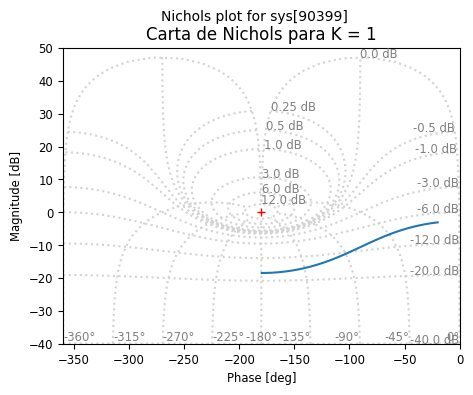

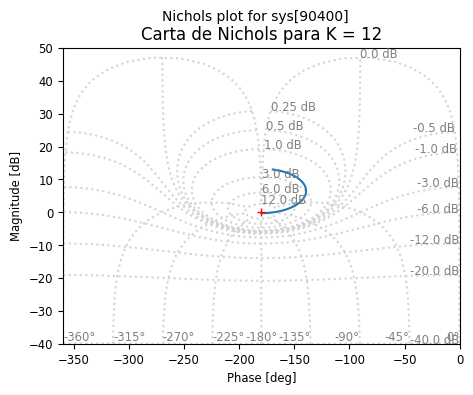

In [21]:

#Funções de transferência
num1 = [0.2051]
den1 = [1, -0.7209]
num12 = [2.4612]
den12 = [1, -1.5352]
Gz1 = ctl.TransferFunction(num1, den1, True)
Gz12 = ctl.TransferFunction(num12, den12, True)

new_figsize = (6.4 * 0.8, 4.8 * 0.8)

plt.figure(figsize=new_figsize)
ctl.nichols_plot(Gz1)
plt.title('Carta de Nichols para K = 1')
plt.show()

plt.figure(figsize=new_figsize)
ctl.nichols_plot(Gz12)
plt.title('Carta de Nichols para K = 12')
plt.show()

A margem de fase e de ganho de cada:

In [22]:
Cz1 = ctl.feedback(Gz1, 1)
Cz3 = ctl.feedback(Gz12, 1)
_, PM1, _, _ = ctl.margin(Cz1)
_, PM12, _, _ = ctl.margin(Cz3)

print(f'A margem para K=1 é {PM1}')
print(f'A margem para K=12 é {PM12}')

A margem para K=1 é inf
A margem para K=12 é inf


A margem para K = 12 não existe porque o sistema já é instável, ou seja, ultrapassa o -180º

5) Lugar das Raízes: O valor se mostra coerente em K=1, pois a linha está sobre um número ímpar do somatório de pólos e zeros.

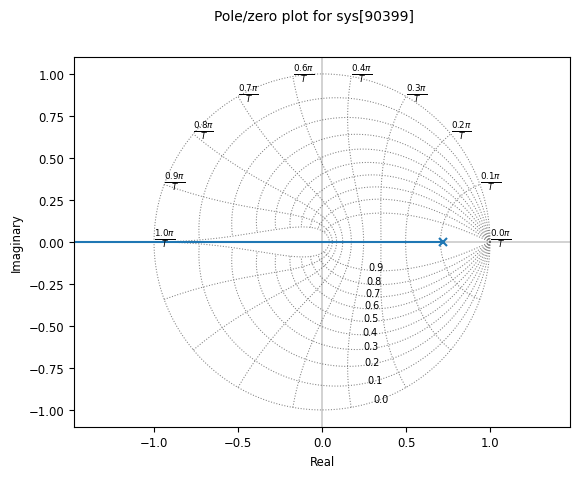

In [23]:
plt.figure()
ctl.root_locus(Gz1)
plt.show()

Para K = 12 que o sistema está fora do raio unitário e por isso tende ao infinito

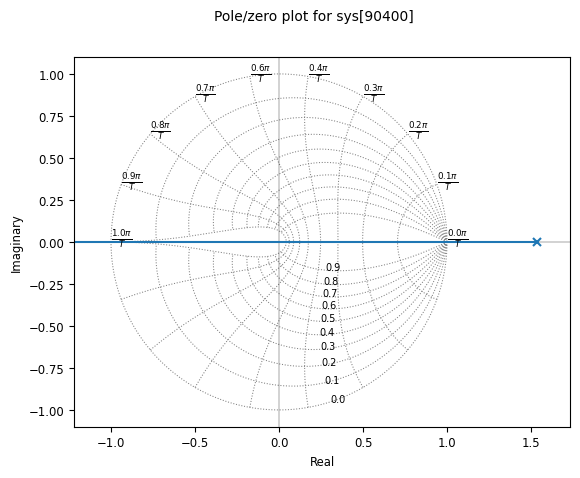

In [24]:
plt.figure()
ctl.root_locus(Gz12)
plt.show()